In [1]:
%load_ext autoreload
import uproot as ut
import utils
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

from utils.cutConfig import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)

In [11]:
def check(key,ie=5):
    print(f"--- {key} ---")
    base = getattr(baseline_selection,key)
    first = getattr(first_selection,key)
    second= getattr(second_selection,key)
    merged= getattr(merged_selection,key)
    print(f"base:   {base[ie]}\nfirst:  {first[ie]}\nsecond: {second[ie]}\nmerged: {merged[ie]}")
# check("sixb_jet_mask")
# check("jets_selected_index")
# check("sixb_selected_index")
# check("sixb_remaining")

In [3]:
baseline = utils.Selection(branches,scheme={"njetcut":6},variable="jet_btag",njets=-1,tag="baseline")

In [4]:
baseline_selection = baseline.selected_njets(6)

In [35]:
scheme = {"njetcut":3,"njets":3,"btagcut":jet_btagWP[looseWP],"tag":"loose btag"}

first_selection = utils.Selection(branches,variable="jet_btag",njets=scheme["njets"],scheme=scheme,
                            previous=baseline,tag=f"{scheme['njets']} {scheme['tag']}")

scheme = {"njetcut":3,"njets":3,"tag":"no btag"}

second_selection = utils.Selection(branches,variable="jet_btag",njets=scheme["njets"],scheme=scheme,
                            previous=first_selection,exclude=True,tag=f"{scheme['njets']} {scheme['tag']}")

merged_selection = second_selection.merge()

In [44]:
zeroline = utils.Selection(branches,scheme={"ptcut":0,"etacut":5,"jetid":None,"puid":None},variable="jet_btag",njets=-1,tag="zeroline")

--- all zeroline ---
Event  Efficiency:       1.0
Signal Efficiency:       1.00
Event  Selected Purity:  0.36
Signal Selected Purity:  1.00
Event  Total Selected:   100.00%
Signal Total Selected:   100.00%
Event  Avg Selected:     5.13 -> 100.00%
Signal Avg Selected:     6.00 -> 100.00%
Event  Avg Captured:     5.13 -> 100.00%
Signal Avg Captured:     6.00 -> 100.00%


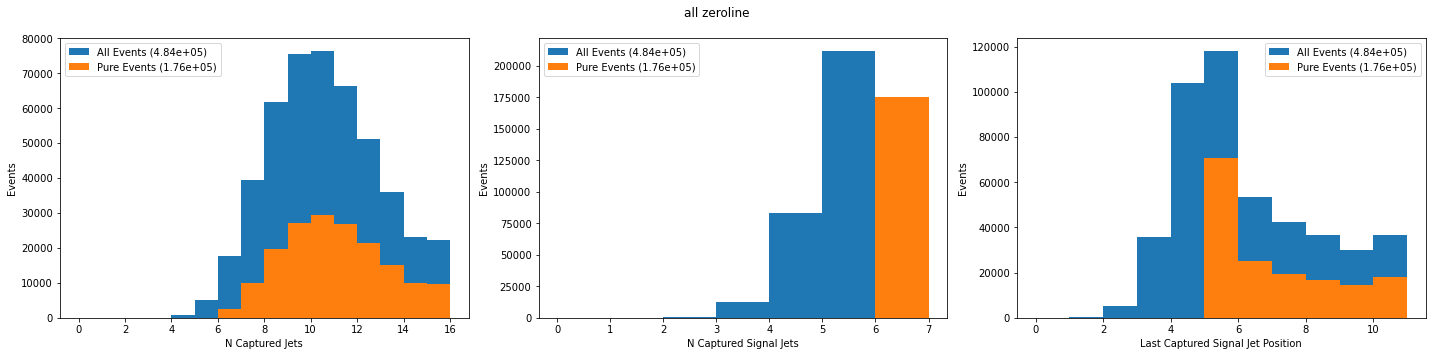

In [47]:
utils.njet_study(zeroline)